# Flights' Cancellation and Delay
### by Harshit Kumar

## Investigation Overview

> This presentation explores the flights dataset that reports cancelled and delayed flights in the United States with the reasons for cancellation and delays, from January 2006 to April 2008.

## Dataset Overview

> The dataset has 16,984,354 flight details with 29 features. The data ranges from Jan 11, 2006 to April 17, 2008.
>
> The variables in the dataset contains information about flights' origin, departure, date and time, duration, cancellation status, delay (and cause of delay), etc.
>
>Also, a flight is considered delayed when its arrival delay is longer than 15 minutes.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
plt.style.use('seaborn')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
flights = pd.read_csv('flights.csv')
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


## Cancelled flights

## Proportion of cancelled flights

Out of 16 million flights from Jan 2006 to Apr 2008, 347k flights (2.04%) were cancelled.

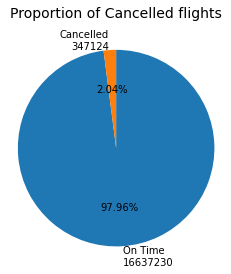

In [ ]:
cancelled_flights = flights['Cancelled'].value_counts()
labels = f'On Time\n{cancelled_flights.values[0]}', f'Cancelled\n{cancelled_flights.values[1]}'
plt.pie(cancelled_flights, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%');
plt.axis('square');
plt.title('Proportion of Cancelled flights\n', fontsize=14);

## Distribution of Cancelled flights by reason

* Most of the flights (42.78%) were cancelled due to Carrier reasons followed by Weather reasons (36.18%).
* Security reasons account the negligible proportion (0.06%) of cancelled flights.

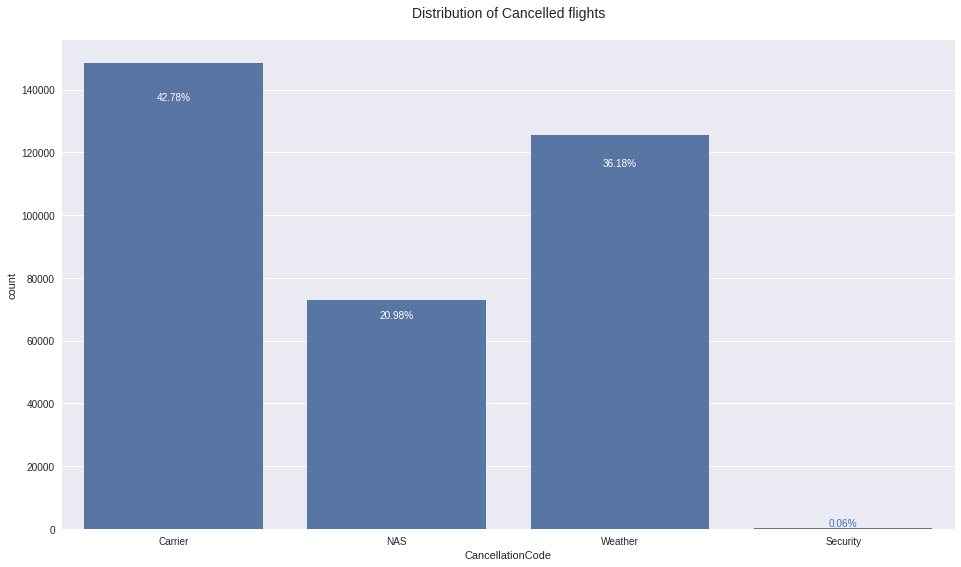

In [ ]:
plt.figure(figsize=(16, 9))
base_color = sns.color_palette()[0]
# df_cancelled = df.query('(Cancelled==1)')
sns.countplot(data=flights, x='CancellationCode', color=base_color)
# add annotations
gen_counts = flights['CancellationCode'].value_counts()
# take proportion only out of Cancelled flights, not total dataframe
n_points = gen_counts.sum()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.2f}%'
    # print the annotation just below the top of the bar
    if count > 2000:
        # print the annotation just below the top of the bar
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'w')
    else:
        plt.text(loc, 1000, pct_string, ha = 'center', color = base_color)

cancel_codes = ['Carrier', 'NAS', 'Weather', 'Security']
plt.xticks(locs, cancel_codes);
plt.title('Distribution of Cancelled flights\n', fontsize=14);

## Distribution of Cancelled flights by month

February and December are the worst month to travel having maximum proportion of delays due to weather.

<Figure size 1152x432 with 0 Axes>

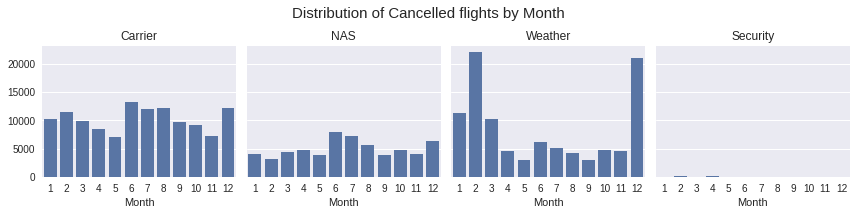

In [ ]:
plt.figure(figsize=(16, 6))
# facetgrid by CancellationCode (removing 2008 year as it contains data of first 4 months only)
g = sns.FacetGrid(data = flights[flights['Year']!=2008], col = 'CancellationCode')
g = g.map(sns.countplot, 'Month', order=[1,2,3,4,5,6,7,8,9,10,11,12])
# set axes title
ax = g.axes.flatten()
for i, code in enumerate(['Carrier', 'NAS', 'Weather', 'Security']):
    ax[i].set_title(code)
plt.subplots_adjust(top=0.8)
plt.suptitle('Distribution of Cancelled flights by Month\n', size=15);

## Proportion of Cancelled flights per Airline

* The WN airline has the highest number of flights and MQ airline has the highest proportion of cancelled flights (4.1%).
* Though YV airline has less flights than many other airlines, it cancelled 3.8% (second-highest) of its flights.

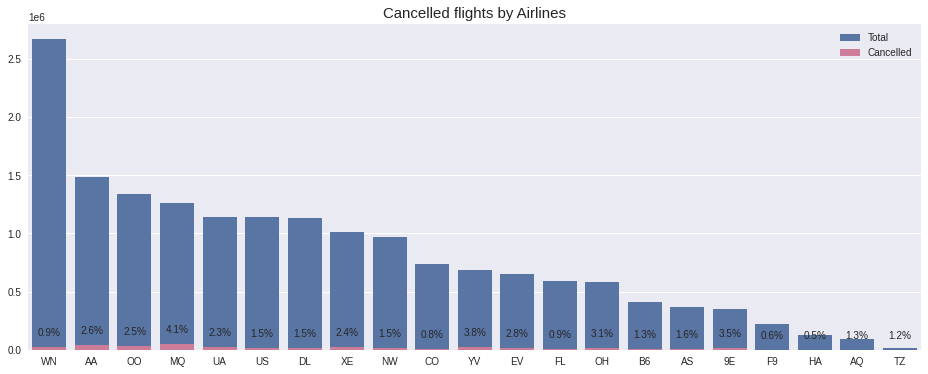

In [ ]:
# sns.countplot(data=flights, x='UniqueCarrier')
plt.figure(figsize=(16, 6))
gen_counts = flights['UniqueCarrier'].value_counts()
cancelled_gen_counts = flights[flights['Cancelled']==1]['UniqueCarrier'].value_counts()
# gen_counts.plot.bar(label='Total', width=.6, order=gen_counts.index)
sns.barplot(gen_counts.index, gen_counts.values, order=gen_counts.index, label='Total', color=base_color)
# cancelled_gen_counts.plot.bar(label='Cancelled', color='palevioletred')
# without order, the xticks are replace accordint to second plot
sns.barplot(cancelled_gen_counts.index, cancelled_gen_counts.values, order=gen_counts.index, label='Cancelled', color='palevioletred')
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    cancelled_count = cancelled_gen_counts[label.get_text()]
    pct_string = f'{100*cancelled_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, cancelled_count+0.1e6, pct_string, ha = 'center')
plt.legend()
plt.xticks(rotation=0)
plt.title('Cancelled flights by Airlines', fontsize=15);

## Delayed flights

A flight is considered delayed if its (arrival) delay is over 15 minutes (inclusive).

In [ ]:
# get delayed flights
delayed_flights = flights[flights['ArrDelay']>=15]

## Proportion of delays by delay cause

The maximum proportion (37.37%) of delay is caused by Late Aircraft. The Late Aircraft delay also causes the maximum average delay (~20min).

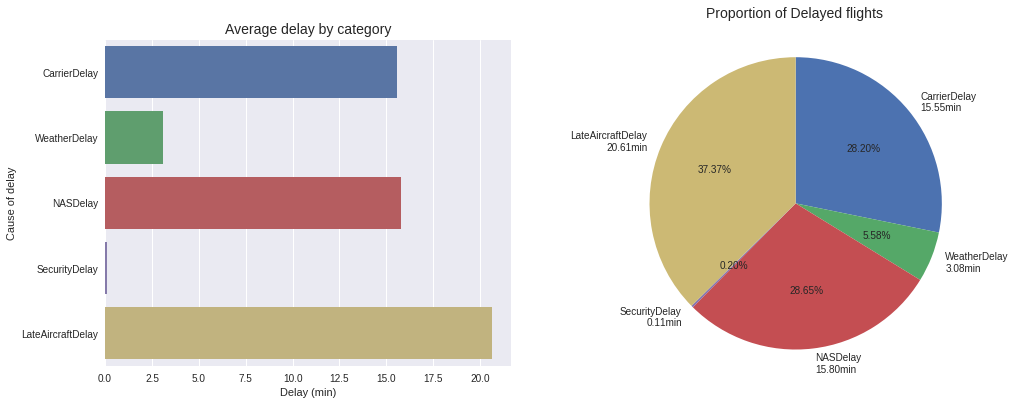

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
means = [delayed_flights[i].mean() for i in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
sns.barplot(means, ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
plt.xlabel('Delay (min)')
plt.ylabel('Cause of delay')
plt.title('Average delay by category', fontsize=14)

plt.subplot(1, 2, 2)
labels = [f'{j}\n{means[i]:.2f}min' for i, j in enumerate(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])]
plt.pie(means, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%');
plt.axis('square');
plt.title('Proportion of Delayed flights\n', fontsize=14);

## Delayed flights by year, month and day

* On Friday, the maximum proportion (27.4%) of flights were delayed.
* December has 29.0% (maximum) of flights delayed. 

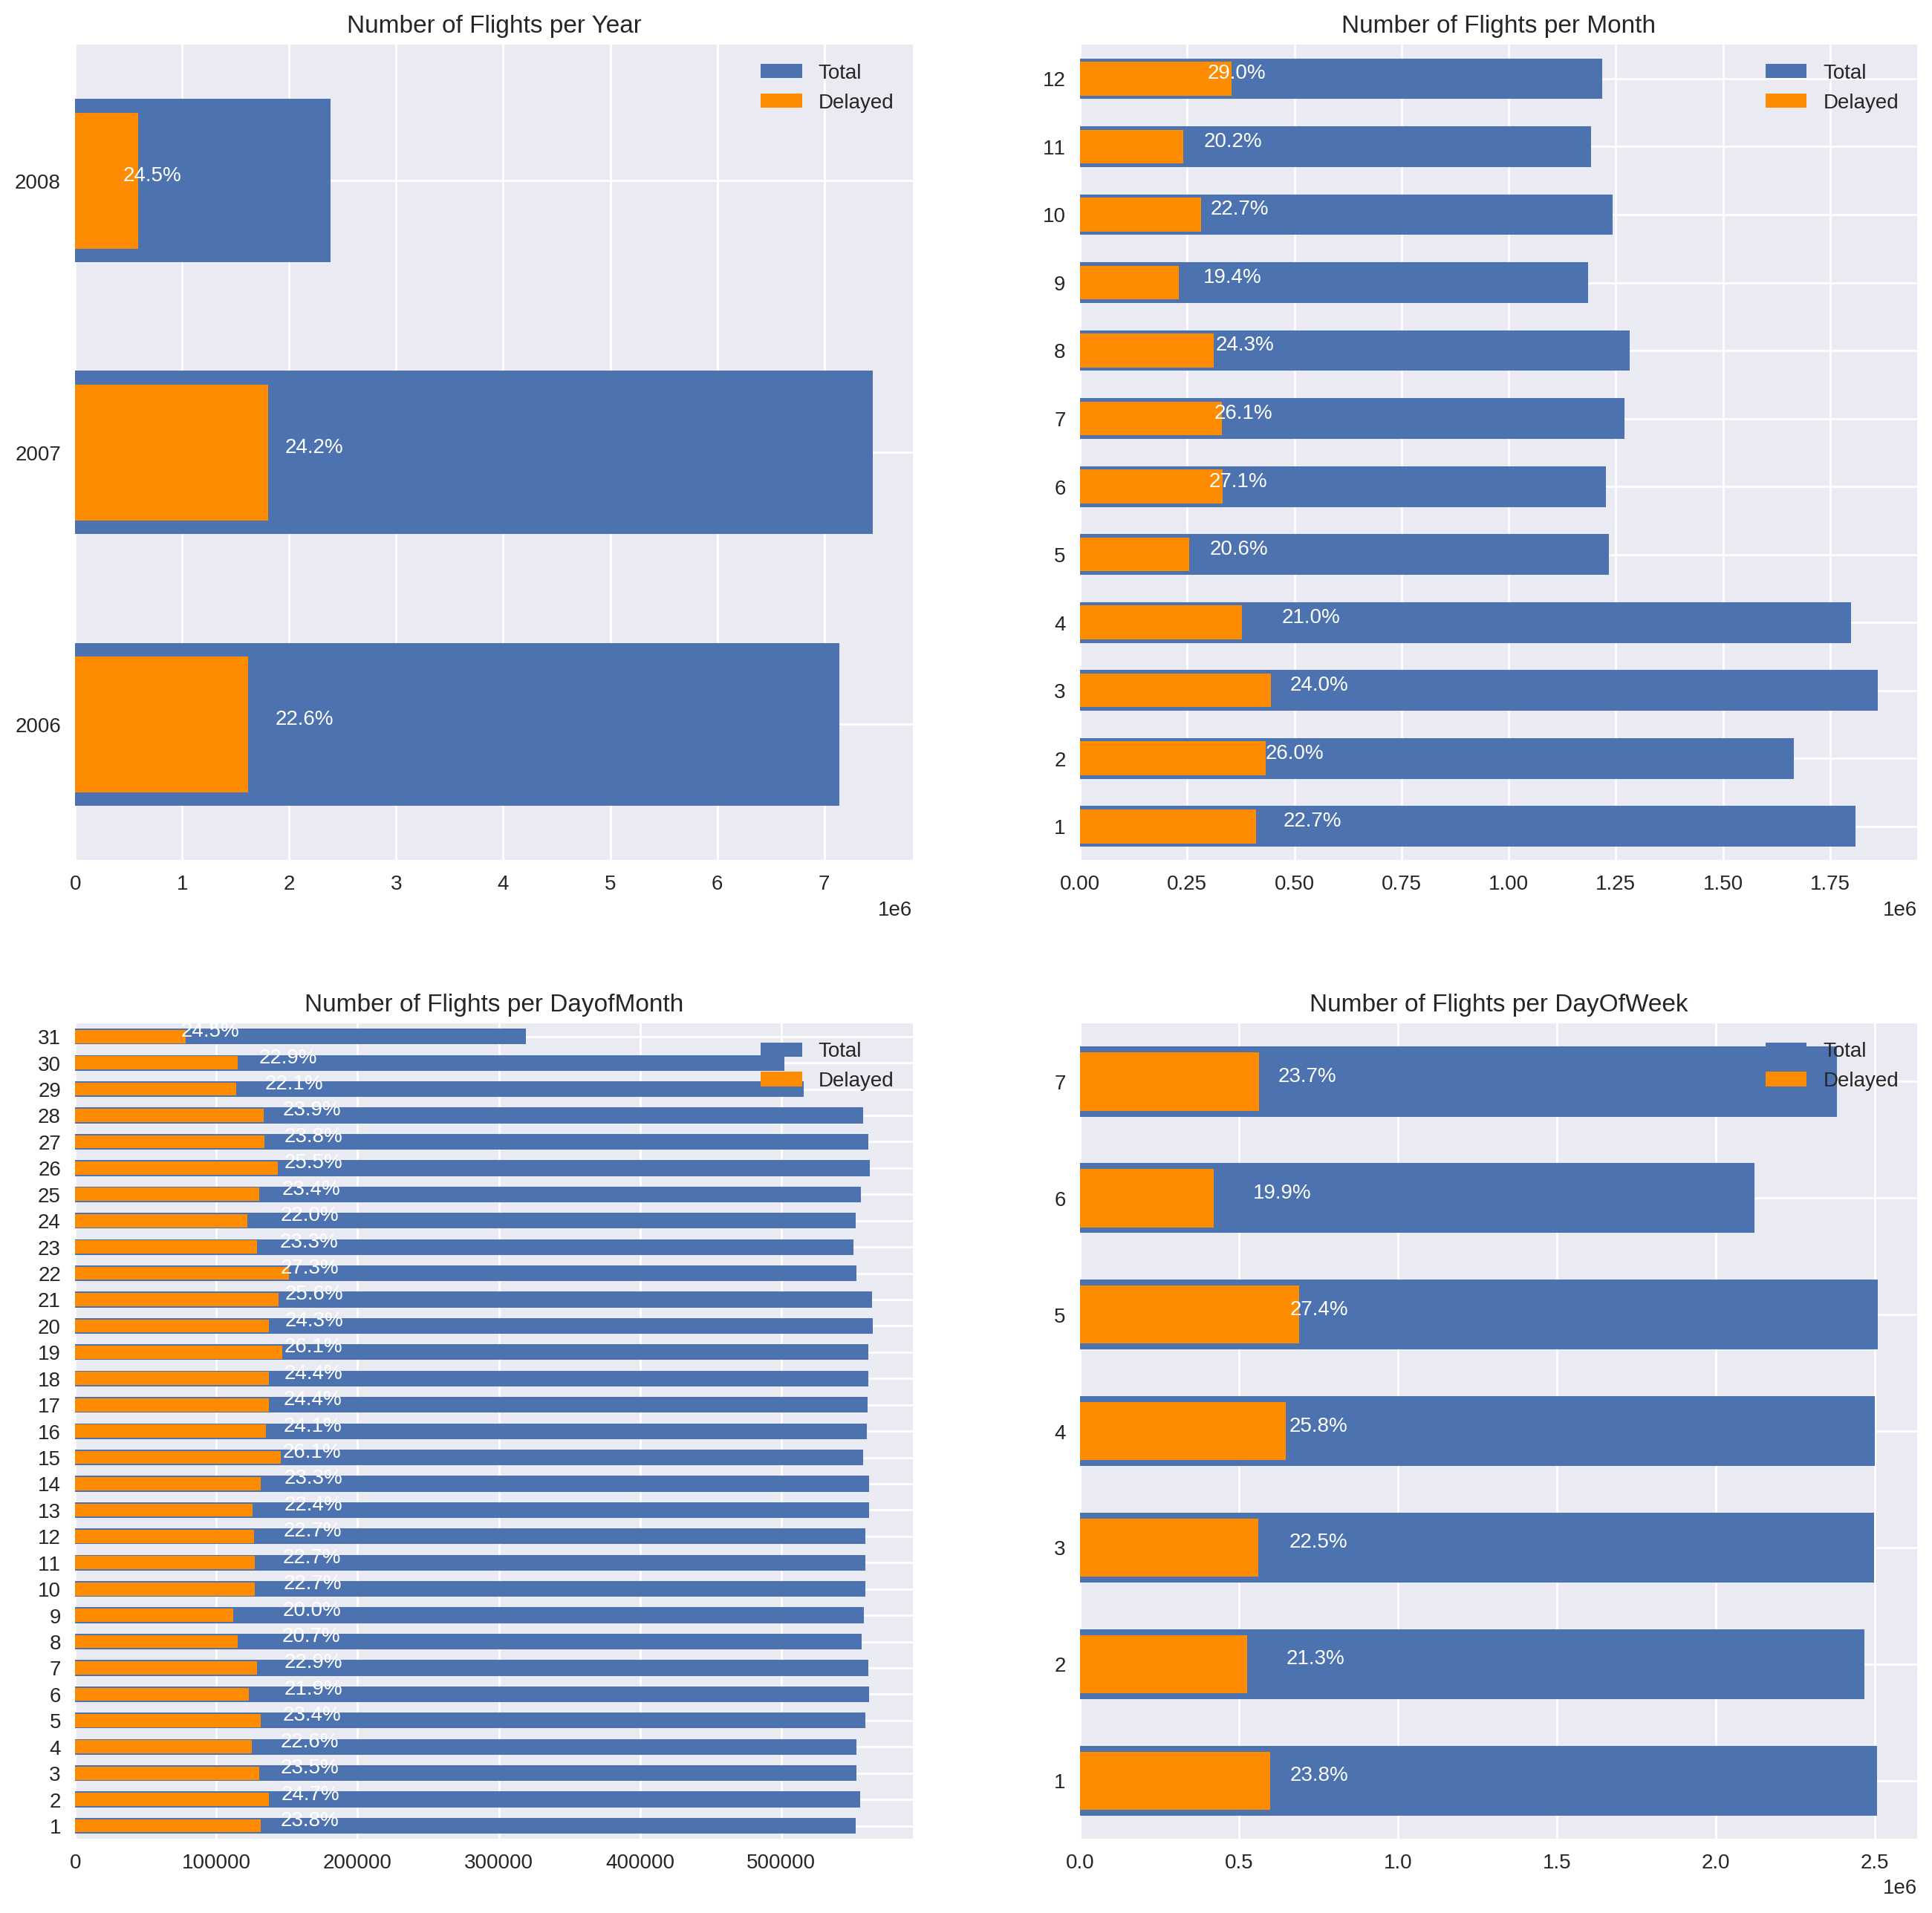

In [ ]:
plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.6)
base_color = sns.color_palette()[0]
n_points = flights.shape[0]
for i, j in enumerate(['Year', 'Month', 'DayofMonth', 'DayOfWeek']):
    plt.subplot(2, 2, i+1)

    # get counts of total and delayed flights
    gen_counts = flights[j].value_counts()
    delayed_gen_counts = delayed_flights[j].value_counts()

    # plot stacked bar charts (reindex or use barplot's order)
    gen_counts.sort_index().plot.barh(label='Total', width=.6)
    delayed_gen_counts.sort_index().plot.barh(label='Delayed', color='darkorange')

    locs, labels = plt.yticks() # get the current tick locations and labels
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        # get the text property for the label to get the correct count
        count = gen_counts[int(label.get_text())]
        delayed_count = delayed_gen_counts[int(label.get_text())]
        pct_string = f'{100*delayed_count/count:0.1f}%'
        # print the annotation just below the top of the bar
        plt.text(0.30*count, loc, pct_string, ha = 'center', color = 'w')

    plt.legend(framealpha = 0.5, fancybox=True);
    plt.title(f'Number of Flights per {j}');

In [ ]:
# melting columns such that type of delay comes in one column
MELTS_COLUMNS = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
STAY_COLUMNS = [x for x in delayed_flights.columns.tolist() if x not in MELTS_COLUMNS]

In [ ]:
delayed = pd.melt(delayed_flights, id_vars=STAY_COLUMNS, value_vars=MELTS_COLUMNS, var_name='CauseDelay', value_name='Delay')
delayed = delayed[delayed.Delay>0] # subset with causes delays time > 0 minutes
delayed['CauseDelay'] = delayed['CauseDelay'].str[:-5] # remove the ending 'Delay' from 'Cause' strings
delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6274831 entries, 6 to 20017196
Data columns (total 26 columns):
 #   Column             Dtype          
---  ------             -----          
 0   Year               int64          
 1   Month              int64          
 2   DayofMonth         int64          
 3   DayOfWeek          int64          
 4   DepTime            timedelta64[ns]
 5   CRSDepTime         timedelta64[ns]
 6   ArrTime            timedelta64[ns]
 7   CRSArrTime         timedelta64[ns]
 8   UniqueCarrier      object         
 9   FlightNum          int64          
 10  TailNum            object         
 11  ActualElapsedTime  float64        
 12  CRSElapsedTime     float64        
 13  AirTime            float64        
 14  ArrDelay           float64        
 15  DepDelay           float64        
 16  Origin             object         
 17  Dest               object         
 18  Distance           int64          
 19  TaxiIn             float64        
 20  T

In [ ]:
categories_cols = ['DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'CauseDelay']

for col in categories_cols:
    delayed[col] = delayed[col].astype('category')

delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6274831 entries, 6 to 20017196
Data columns (total 26 columns):
 #   Column             Dtype          
---  ------             -----          
 0   Year               int64          
 1   Month              int64          
 2   DayofMonth         int64          
 3   DayOfWeek          category       
 4   DepTime            timedelta64[ns]
 5   CRSDepTime         timedelta64[ns]
 6   ArrTime            timedelta64[ns]
 7   CRSArrTime         timedelta64[ns]
 8   UniqueCarrier      category       
 9   FlightNum          int64          
 10  TailNum            object         
 11  ActualElapsedTime  float64        
 12  CRSElapsedTime     float64        
 13  AirTime            float64        
 14  ArrDelay           float64        
 15  DepDelay           float64        
 16  Origin             category       
 17  Dest               category       
 18  Distance           int64          
 19  TaxiIn             float64        
 20  T

## Range of delay by year, month and day


* Arrival delay is clearly greater from September to December compared to other months.
* The arrival delay by year shows that the median delay is greater in first four months of 2008 followed by 2006 then 2008.
* Friday has the maximum median delay compared to other days.

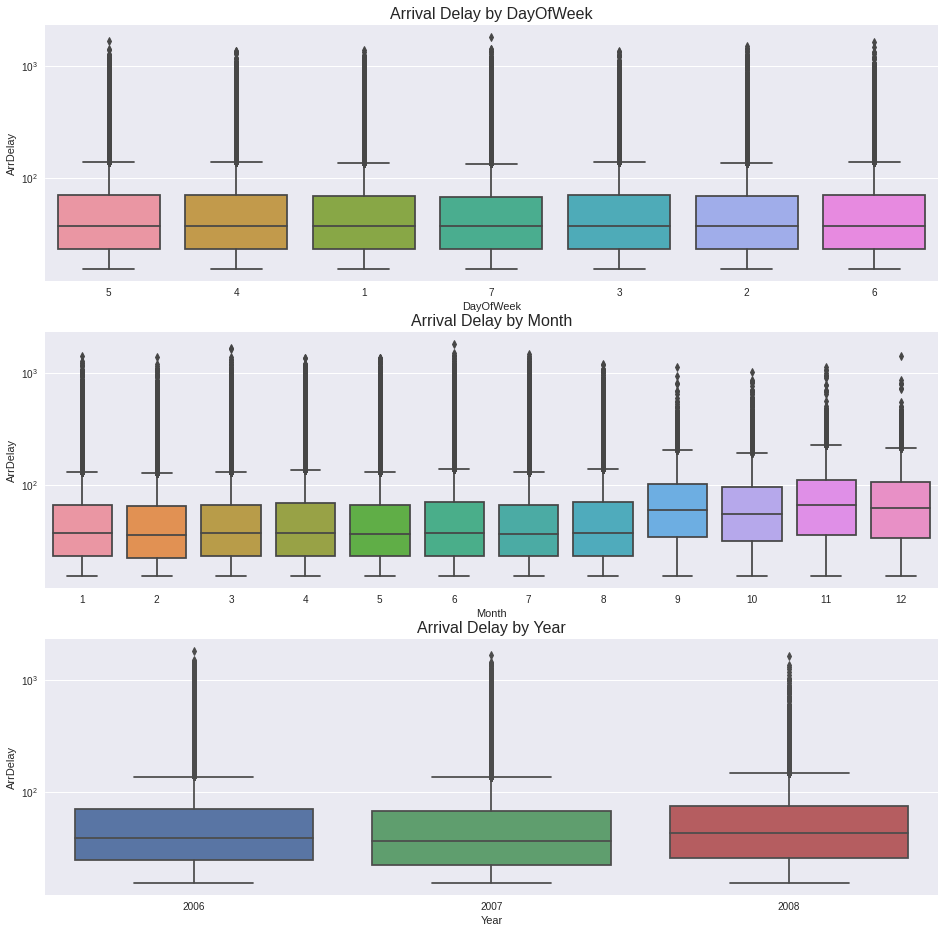

In [ ]:
plt.figure(figsize=(16, 16))
plt.subplot(3, 1, 1)
order = delayed_flights.groupby('DayOfWeek')['ArrDelay'].median().sort_values(ascending=False).index
sns.boxplot(data=delayed_flights, x='DayOfWeek', y=delayed['ArrDelay'], order=order);
plt.yscale('log');
plt.title('Arrival Delay by DayOfWeek', fontsize=16);

plt.subplot(3, 1, 2)
# order = delayed_flights.groupby('DayOfWeek')['ArrDelay'].median().sort_values(ascending=False).index
sns.boxplot(data=delayed_flights, x='Month', y=delayed['ArrDelay'])#, order=order);
plt.yscale('log');
plt.title('Arrival Delay by Month', fontsize=16);

plt.subplot(3, 1, 3)
# order = delayed_flights.groupby('DayOfWeek')['ArrDelay'].median().sort_values(ascending=False).index
sns.boxplot(data=delayed_flights, x='Year', y=delayed['ArrDelay'])#, order=order);
plt.yscale('log');
plt.title('Arrival Delay by Year', fontsize=16);

## Correlation b/w delays

* There is a high correlation between Arrival and Departure delay, which is expected. 
* Both Arrival and Departure delay also have ~0.5 correlation with Carrier and Late Aircraft delay meaning that in case of Carrier and Late Aircraft delay, the flight has higher chance of departing (and, of course, arriving) late.
* There is negative correlation among Carrier, NAS, Security and Late Aircraft delay.

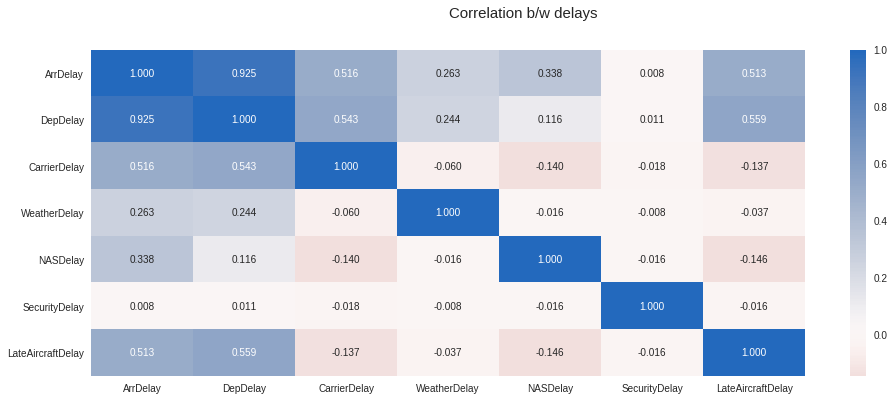

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(delayed_flights[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);
plt.suptitle('Correlation b/w delays', size=15);

## Proportion of delayed flights per Airline

* The airline EV has the maximum proportion of delayed flights (30.8%) followed by TZ (29.3%).
* By number, the WN airline having the maximum flights also have maximum delayed flights.

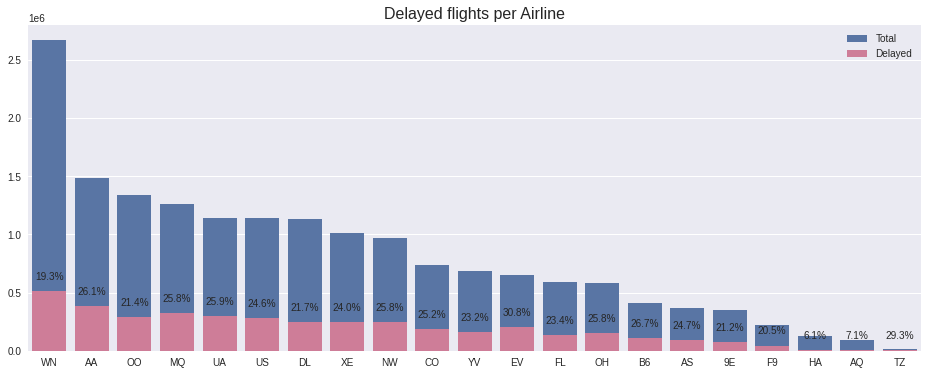

In [ ]:
plt.figure(figsize=(16, 6))
gen_counts = flights['UniqueCarrier'].value_counts()
delayed_gen_counts = delayed_flights['UniqueCarrier'].value_counts()
gen_counts.plot.bar(label='Total', width=.6)
# sns.barplot(gen_counts.index, gen_counts.values, order=gen_counts.index, label='Total', color=base_color)
delayed_gen_counts.reindex(gen_counts.index).plot.bar(label='Delayed', color='palevioletred')
# sns.barplot(delayed_gen_counts.index, delayed_gen_counts.values, order=gen_counts.index, label='Delayed', color='palevioletred')
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    delayed_count = delayed_gen_counts[label.get_text()]
    pct_string = f'{100*delayed_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, delayed_count+0.1e6, pct_string, ha = 'center')
plt.legend()
plt.xticks(rotation=0)
plt.title('Delayed flights per Airline', fontsize=16);

## Range of Delay per Airline

* The airline YV has the maximum median delay followed closely by other airlines.
* The airlines HA, AQ, and F9 have lowest median delay as well inter-quartile (IQR) range.

* The NAS is the most common delay cause for most of the airlines and Security the least common.
* For some airlines such as AQ and HA, Late aircraft causes the most delay.

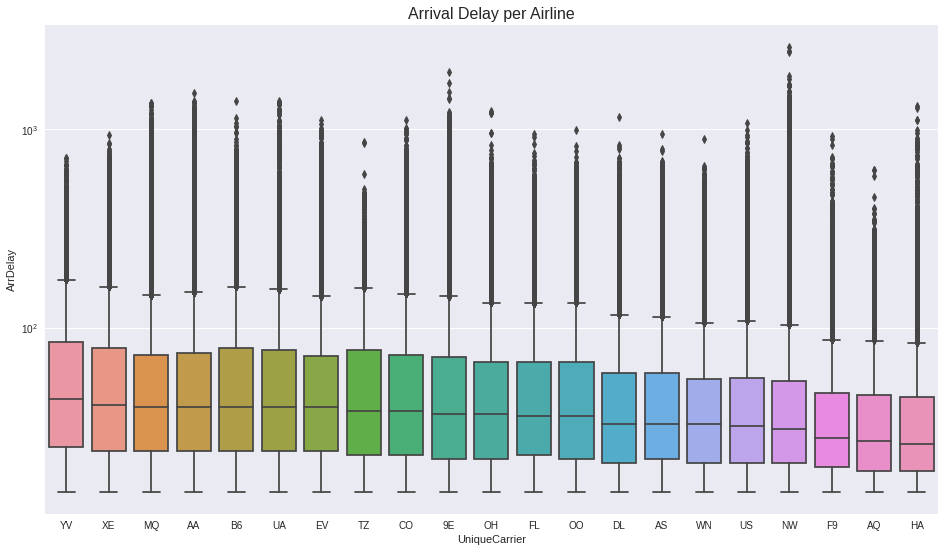

In [ ]:
plt.figure(figsize=(16, 9))
order = delayed_flights.groupby('UniqueCarrier')['ArrDelay'].median().sort_values(ascending=False).index
sns.boxplot(data=delayed_flights, x='UniqueCarrier', y=delayed_flights['ArrDelay'], order=order);
plt.yscale('log');
plt.title('Arrival Delay per Airline', fontsize=16);

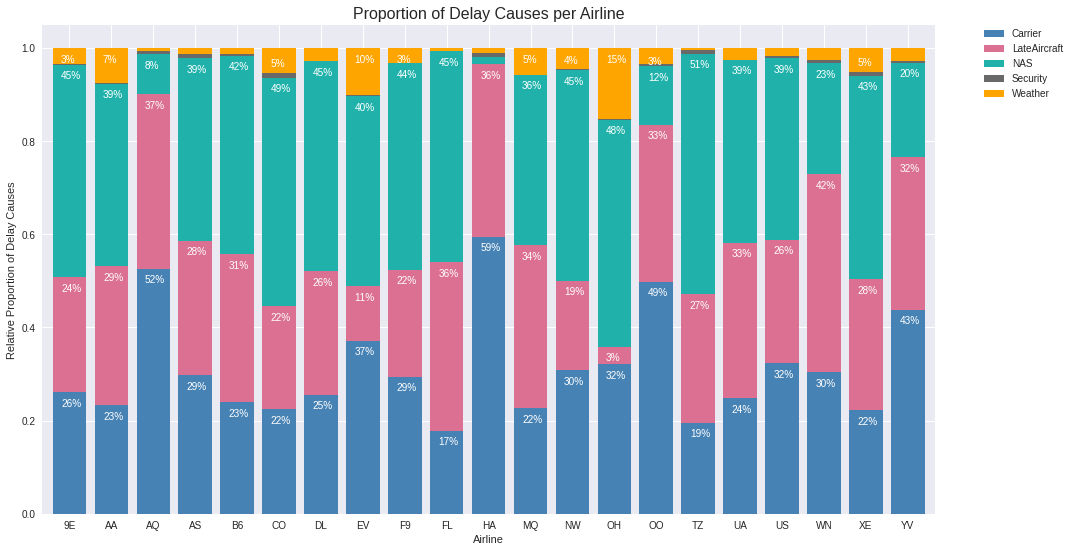

In [ ]:
df_plot = delayed.groupby(['CauseDelay', 'UniqueCarrier']).size().reset_index().\
                            pivot(columns='CauseDelay', index='UniqueCarrier', values=0)   

del_by_airln = delayed.groupby('UniqueCarrier').size()

# Calculate proportion of delayed flight operations by airlines
df_plot_proportion = df_plot.div(del_by_airln, axis='index')


data_idx = df_plot_proportion.index

df_plot_proportion.plot.bar(stacked=True, width = 0.8, color=['steelblue', 'palevioletred', 'lightseagreen', 'dimgray', 'orange'], figsize=(16, 9));

plt.title('Proportion of Delay Causes per Airline', fontsize=16)
plt.xlabel('Airline')
plt.ylabel('Relative Proportion of Delay Causes')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xticks(rotation = 0);

# Annotations
for idx in data_idx: 
    
    initial_height = 0

    for col in df_plot_proportion.columns:   # ['Carrier', 'LateAircraft', 'NAS', 'Security', 'Weather']   

        if col != 'Security':  
            value  = df_plot_proportion.loc[idx, col]
            text   = str( int( value * 100)) + '%'
            height = value + initial_height
            x_loc  = data_idx.get_loc(idx)

            if value > 0.03:
                plt.annotate(text, (x_loc - .2, height - .03), color = 'w')#, fontsize=8);
            
        initial_height = height

## Delayed flights per Airport

* ATL is the busiest airport having more than 900k flights out of which 28.3% were delayed. 
* In the top 10 busiest airports, EWR has maximum proportion (32.2%) of delayed flights.

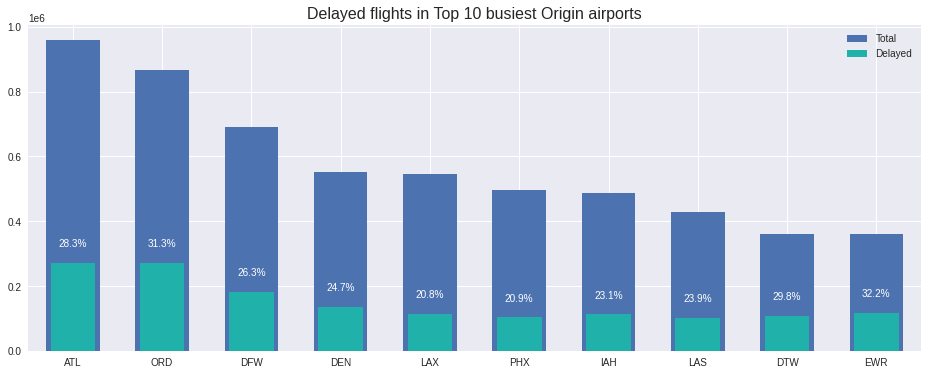

In [ ]:
plt.figure(figsize=(16, 6))
gen_counts = flights['Origin'].value_counts()[:10]
delayed_gen_counts = delayed_flights['Origin'].value_counts()[:10]
gen_counts.plot.bar(label='Total', width=.6)
# sns.barplot(gen_counts.index, gen_counts.values, order=gen_counts.index, label='Total', color=base_color)
# use order or reindex
delayed_gen_counts.reindex(gen_counts.index).plot.bar(label='Delayed', color='lightseagreen')
# sns.barplot(delayed_gen_counts.index, delayed_gen_counts.values, order=gen_counts.index, label='Delayed', color='lightseagreen')
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    delayed_count = delayed_gen_counts[label.get_text()]
    pct_string = f'{100*delayed_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, delayed_count+0.05e6, pct_string, ha = 'center', color='w')
plt.legend()
plt.xticks(rotation=0)
plt.title('Delayed flights in Top 10 busiest Origin airports', fontsize=16);

# End of presentation